# Can we predict business registration?

In [1]:
import pandas as pd 
import numpy as np

# Tratamentos iniciais

1) Lendo os dados 

In [19]:
#A tabela Base_novo_tratamento esta com a coluna porte_municipio com os dados em formato objetc, a tabela Base_novo_tratamento_teste
#esta no formato float64 e a Base_novo_teste esta com a coluna porte_municipio em formato int64

df= pd.read_excel("Base_novo_teste.xlsx")

2) Selecionando as variávies que vamos utilizar

In [20]:
df = df[['qtd_abertas_Empresario_Individual','Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','taxa_homicidio','RH_adm_dir','ISH','densidade_banda_larga','densidade_telefonia_movel','qtd_cursos_engenharias',
    'qtd_cursos_negocios_direito','media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO','valor_medio_recebido_familia','pib_per_capita_preco_corrente','perc_20_59_anos','pop_total','total_sim_tecnologia','porte_municipio']]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   qtd_abertas_Empresario_Individual  5570 non-null   int64  
 1   Mecanismos_incentivo               5568 non-null   object 
 2   Reducao_IPTU                       3484 non-null   object 
 3   Isencao_IPTU                       3484 non-null   object 
 4   Reducao_ISSQN                      3484 non-null   object 
 5   Isencao_ISSQN                      3484 non-null   object 
 6   Isencao_Tx                         3484 non-null   object 
 7   Cessao_terrenos                    3484 non-null   object 
 8   Doacao_terrenos                    3484 non-null   object 
 9   Outros_mecanismos                  3484 non-null   object 
 10  taxa_homicidio                     3890 non-null   float64
 11  RH_adm_dir                         5547 non-null   float

3) Tratamentos iniciais 

Transformando o nome do município no índice da tabela

In [22]:
#df = df.set_index('NMMUN')
df.head()

,qtd_abertas_Empresario_Individual,Mecanismos_incentivo,Reducao_IPTU,Isencao_IPTU,Reducao_ISSQN,Isencao_ISSQN,Isencao_Tx,Cessao_terrenos,Doacao_terrenos,Outros_mecanismos,...,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,media_NU_NOTA_REDACAO,valor_medio_recebido_familia,pib_per_capita_preco_corrente,perc_20_59_anos,pop_total,total_sim_tecnologia,porte_municipio
0,194,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,504.034091,491.079545,543.558537,621.363636,18495,25091.18,0.587227,22516,18.0,2
1,1275,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,Sim,...,495.727950,484.710248,518.811149,584.534161,17615,25730.20,0.591797,111148,12.0,4
2,49,Sim,Não,Não,Não,Sim,Não,Não,Não,Sim,...,486.071429,447.628571,522.883333,471.428571,18956,32226.25,0.584567,5067,8.0,1
3,1258,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,Não,...,505.006061,490.991919,533.458933,611.717172,19376,29331.29,0.595584,86416,17.0,3
4,257,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,...,477.045714,454.722857,480.696875,576.571429,17752,37069.25,0.598272,16088,8.0,2


Vamos fazer alguns tratamentos para algumas variáveis. 
- Nas variáveis sobre taxa de homicídios, cursos de engenharia ou negócios/direito, vamos transformar os "NA" em 0
- Nas variáveis de políticas municipais, adicionamos "Não" aos "NA"
- Nas variáveis do Enem, substituímos o valor pela mediana

In [23]:
df['qtd_cursos_engenharias'] = df['qtd_cursos_engenharias'].fillna(0)

df['qtd_cursos_negocios_direito'] = df['qtd_cursos_negocios_direito'].fillna(0)

df['total_sim_tecnologia'] = df['total_sim_tecnologia'].fillna(0)

df['taxa_homicidio'] = df['taxa_homicidio'].fillna(0)

df['RH_adm_dir'] = df['RH_adm_dir'].fillna(0)

In [24]:
df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']] = df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']].fillna('Não')

In [25]:
df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']] = df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].fillna(df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].median())


In [26]:
#aqui eu separei as colunas que precisariam passar pelo get_dummies, para que a porte_municipio não fosse modificada junto
df = pd.get_dummies(df, columns = ['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','ISH'], drop_first=True)

In [27]:
df = df[np.isfinite(df).all(1)]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   qtd_abertas_Empresario_Individual  5570 non-null   int64  
 1   taxa_homicidio                     5570 non-null   float64
 2   RH_adm_dir                         5570 non-null   float64
 3   densidade_banda_larga              5570 non-null   float64
 4   densidade_telefonia_movel          5570 non-null   float64
 5   qtd_cursos_engenharias             5570 non-null   float64
 6   qtd_cursos_negocios_direito        5570 non-null   float64
 7   media_notas_CN                     5570 non-null   float64
 8   media_notas_CH                     5570 non-null   float64
 9   media_NU_NOTA_LC                   5570 non-null   float64
 10  media_NU_NOTA_MT                   5570 non-null   float64
 11  media_NU_NOTA_REDACAO              5570 non-null   float

4) Separando variável dependente e variáveis independentes 

In [29]:
X = df.drop('qtd_abertas_Empresario_Individual', axis = 1)
y = df['qtd_abertas_Empresario_Individual']

# Rodando algoritmos

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,
                                                    random_state=42, stratify = df['porte_municipio'])

# vamos criar uma variável para região do município para usar no stratify. Eu tentei usar a variável SGUF, mas como 
# DF só tem um caso, ele não deixou eu aplicar

In [14]:
list(X_train.select_dtypes(include = ['float64','int64']))

['taxa_homicidio',
 'RH_adm_dir',
 'densidade_banda_larga',
 'densidade_telefonia_movel',
 'qtd_cursos_engenharias',
 'qtd_cursos_negocios_direito',
 'media_notas_CN',
 'media_notas_CH',
 'media_NU_NOTA_LC',
 'media_NU_NOTA_MT',
 'media_NU_NOTA_REDACAO',
 'valor_medio_recebido_familia',
 'pib_per_capita_preco_corrente',
 'perc_20_59_anos',
 'pop_total',
 'total_sim_tecnologia',
 'porte_municipio']

In [46]:
df = pd.set_option('display.max_columns', 30)

In [47]:
# https://stackoverflow.com/questions/48673402/how-can-i-standardize-only-numeric-variables-in-an-sklearn-pipeline
# criei esse procedimento para padronizar o valor das variáveis 

scaler = StandardScaler()

numeric_features = list(X_train.select_dtypes(include = ['float64','int64']))

X_train.loc[:,numeric_features] = scaler.fit_transform(X_train.loc[:,numeric_features])

X_train.head(30)

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,media_NU_NOTA_REDACAO,valor_medio_recebido_familia,pib_per_capita_preco_corrente,perc_20_59_anos,pop_total,total_sim_tecnologia,porte_municipio,Mecanismos_incentivo_Sim,Reducao_IPTU_Sim,Isencao_IPTU_Sim,Reducao_ISSQN_Sim,Isencao_ISSQN_Sim,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima
2606,0.116756,0.611173,1.006129,1.767547,0.169888,0.022096,1.450706,1.174648,1.295212,1.771645,1.120869,-0.198662,3.834521,0.987071,0.069618,1.284995,1.473971,1,1,0,1,0,0,1,0,1,0,0,1,0
74,-0.173225,-0.046934,-1.005804,-1.236566,-0.096836,-0.084257,-1.627144,-1.529604,-1.783998,-1.462967,-1.472666,1.884458,-0.565449,-4.256595,-0.093326,-2.088622,0.295189,0,0,0,0,0,0,0,0,0,1,0,0,0
4649,-0.202223,-0.274889,-0.414348,1.131942,-0.096836,-0.084257,-0.521569,0.145850,-0.072585,-0.231025,0.216382,-0.521286,1.888330,0.154431,-0.157030,-0.883759,-0.883592,1,1,0,0,0,1,1,1,1,0,0,0,0
1672,-0.173225,-0.157167,-0.348714,-0.108673,-0.096836,-0.084257,-1.603653,-0.621599,-1.894398,-0.102071,-1.832006,-0.519410,-0.516624,0.052981,-0.140135,-0.642786,-0.883592,1,0,0,0,0,1,0,0,0,0,0,1,0
4360,-0.173225,-0.255119,1.719974,0.450138,-0.096836,-0.084257,1.256313,0.644332,0.308768,0.982915,0.245704,0.128249,0.757906,0.382742,-0.139111,0.803050,-0.883592,1,0,0,0,0,0,1,1,0,0,0,0,0
1037,-0.173225,-0.143687,-1.028015,-0.536530,-0.096836,-0.084257,-1.702239,-1.328854,-0.895185,-0.994578,-1.581552,-0.295396,-0.510525,0.560509,-0.137584,-0.883759,-0.883592,0,0,0,0,0,0,0,0,0,0,0,0,0
4525,-0.231222,-0.258414,-0.949775,0.111222,-0.096836,-0.084257,-0.022794,-0.172225,-0.634407,-1.060420,-0.711383,-0.404723,0.170054,0.827088,-0.140215,0.080132,-0.883592,0,0,0,0,0,0,0,0,0,0,0,0,0
1307,-0.173225,-0.097857,-1.035964,0.184217,-0.096836,-0.084257,-1.167867,-1.079860,-1.118630,-1.410785,0.260366,-0.083975,-0.661924,0.213395,-0.087971,-0.401813,0.295189,0,0,0,0,0,0,0,0,0,1,0,0,0
1536,0.000764,-0.086474,-0.568201,-0.092110,-0.096836,-0.084257,0.275366,0.519611,0.166989,0.369446,-0.169322,1.677057,-0.631947,-1.570126,-0.080469,-1.365704,0.295189,0,0,0,0,0,0,0,0,0,0,0,0,0
306,-0.028235,-0.048431,-0.233193,-0.747572,-0.096836,-0.076420,-0.263300,-0.598961,-0.434461,0.137793,-0.223456,1.906699,-0.374016,-1.191382,-0.064250,-1.847650,0.295189,1,1,1,0,0,1,1,0,0,1,0,0,0


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3620 entries, 1758 to 3514
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   taxa_homicidio                 3620 non-null   float64
 1   RH_adm_dir                     3620 non-null   float64
 2   densidade_banda_larga          3620 non-null   float64
 3   densidade_telefonia_movel      3620 non-null   float64
 4   qtd_cursos_engenharias         3620 non-null   float64
 5   qtd_cursos_negocios_direito    3620 non-null   float64
 6   media_notas_CN                 3620 non-null   float64
 7   media_notas_CH                 3620 non-null   float64
 8   media_NU_NOTA_LC               3620 non-null   float64
 9   media_NU_NOTA_MT               3620 non-null   float64
 10  media_NU_NOTA_REDACAO          3620 non-null   float64
 11  valor_medio_recebido_familia   3620 non-null   int64  
 12  pib_per_capita_preco_corrente  3620 non-null 

In [33]:
#aqui eu exclui a variavel da estratificação pq vc havia dito que ela não entra na hora da predição

X_train = X_train.drop('porte_municipio', axis = 1)
X_test = X_test.drop('porte_municipio', axis = 1)

### 1) Regressão linear

In [34]:
reg = LinearRegression().fit(X_train, y_train)

In [35]:
y_pred = reg.predict(X_test)

In [36]:
mae_rl = mean_absolute_error(y_true=y_test,y_pred=y_pred)

In [37]:
mape_rl = mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred)

In [38]:
rmse_rl = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

In [39]:
print("MAE:",mae_rl)
print("MAPE:",mape_rl)
print("RMSE:",rmse_rl)

MAE: 159.14248327295553
MAPE: 1.7815855064140447
RMSE: 662.3799243137842


### 2) Regressão RiDGE 

In [40]:
#RIDGE

from sklearn.linear_model import Ridge

ridge_model = Ridge()

ridge_model.fit(X_train, y_train)

test_pred = ridge_model.predict(X_test)
train_pred = ridge_model.predict(X_train)


#mae
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print("train MAE:", train_mae)
print("test MAE:", test_mae)

#mape
train_mape = np.sqrt (mean_absolute_percentage_error(y_train, train_pred))
test_mape = np.sqrt (mean_absolute_percentage_error(y_test, test_pred))
print("train MAPE:", train_mape)
print("test MAPE:", test_mape)

#rmse
train_rmse = np.sqrt (mean_squared_error (y_train, train_pred))
test_rmse = np.sqrt (mean_squared_error (y_test, test_pred))
print("train RMSE:", train_rmse)
print("test RMSE:", test_rmse)

train MAE: 143.98430346575216
test MAE: 158.74117862959224
train MAPE: 1.3439969138452204
test MAPE: 1.33039587260809
train RMSE: 389.7863130480476
test RMSE: 662.6828601844888


### 3)Regressão LASSO

In [41]:
#LASSO

from sklearn.linear_model import Lasso

lasso_model = Lasso()

lasso_model.fit(X_train, y_train)

test_pred = lasso_model.predict(X_test)
train_pred = lasso_model.predict(X_train)


#mae
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print("train MAE:", train_mae)
print("test MAE:", test_mae)

#mape
train_mape = np.sqrt (mean_absolute_percentage_error(y_train, train_pred))
test_mape = np.sqrt (mean_absolute_percentage_error(y_test, test_pred))
print("train MAPE:", train_mape)
print("test MAPE:", test_mape)

#rmse
train_rmse = np.sqrt (mean_squared_error (y_train, train_pred))
test_rmse = np.sqrt (mean_squared_error (y_test, test_pred))
print("train RMSE:", train_rmse)
print("test RMSE:", test_rmse)

train MAE: 143.46335868105385
test MAE: 157.74314253226794
train MAPE: 1.3460701235258261
test MAPE: 1.322148978475713
train RMSE: 390.2943461155101
test RMSE: 662.0909131802183


C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.717e+06, tolerance: 8.254e+06
  model = cd_fast.enet_coordinate_descent(


### 4) Regressão ElasticNet

In [42]:
#Elasticnet

from sklearn.linear_model import ElasticNet

enr_model = ElasticNet()

enr_model.fit(X_train, y_train)

test_pred = enr_model.predict(X_test)
train_pred = enr_model.predict(X_train)

#mae
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print("train MAE:", train_mae)
print("test MAE:", test_mae)

#mape
train_mape = np.sqrt (mean_absolute_percentage_error(y_train, train_pred))
test_mape = np.sqrt (mean_absolute_percentage_error(y_test, test_pred))
print("train MAPE:", train_mape)
print("test MAPE:", test_mape)

#rmse
train_rmse = np.sqrt (mean_squared_error (y_train, train_pred))
test_rmse = np.sqrt (mean_squared_error (y_test, test_pred))
print("train RMSE:", train_rmse)
print("test RMSE:", test_rmse)


train MAE: 143.3409067447743
test MAE: 156.90686678920565
train MAPE: 1.3511682495956447
test MAPE: 1.3152879773063568
train RMSE: 391.87517011734224
test RMSE: 659.2537496489815


C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.517e+07, tolerance: 8.254e+06
  model = cd_fast.enet_coordinate_descent(


### 5) Arvore de Decisão - Regressão

In [43]:
#biblioteca - Arvore de Decisão (regressão)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [44]:
import pylab


In [45]:
%matplotlib inline

In [52]:
#separando em treino e teste

X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size = 0.35, random_state= 42) # 30%

In [49]:
X_treino

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Reducao_ISSQN_Sim,Isencao_ISSQN_Sim,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima
1444,0.0,225.0,11.776789,95.241356,0.0,0.0,449.000000,391.900000,467.350000,401.600000,...,0,0,0,0,0,0,0,0,0,0
2770,2.0,365.0,4.027778,54.157407,0.0,0.0,492.420000,515.500000,511.460000,544.230000,...,0,0,0,0,0,1,0,0,1,0
744,0.0,273.0,2.144447,86.971475,0.0,0.0,414.807143,415.164286,412.607143,441.171429,...,0,0,0,0,0,0,0,0,1,0
5130,9.0,1121.0,2.334039,103.779772,19.0,42.0,474.657862,499.261212,485.646061,516.006918,...,0,0,0,0,0,1,0,0,0,0
174,46.0,3694.0,5.723091,65.679132,15.0,56.0,469.073952,496.274118,474.068529,498.010778,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.0,232.0,10.573343,96.667908,0.0,0.0,435.880000,460.266667,460.033333,492.340000,...,0,0,0,0,0,0,0,0,0,0
5191,0.0,290.0,15.437337,18.668407,0.0,0.0,423.766667,454.883333,406.283333,434.600000,...,0,0,0,0,0,0,0,0,0,0
5226,0.0,411.0,13.281941,27.562239,0.0,0.0,450.650000,472.000000,420.100000,481.600000,...,0,0,0,0,0,0,0,0,0,0
5390,0.0,189.0,22.360248,25.465839,0.0,0.0,436.537500,481.437500,458.025000,441.337500,...,0,0,0,0,0,0,0,0,1,0


In [53]:
#max_depth = quantidade de divisões

arvore_decisao = DecisionTreeRegressor( max_depth= 3, random_state= 0) #OUTRO PARAMENTO -> min_samples_leaf
arvore_decisao.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [54]:
pred_arv_decisao = arvore_decisao.predict(X_valid)

np.sqrt (mean_squared_error (y_valid, pred_arv_decisao))

3752.047820628739

[Text(0.5909090909090909, 0.875, 'pop_total <= 2280668.0\nsquared_error = 6352939.456\nsamples = 3620\nvalue = 487.29'),
 Text(0.36363636363636365, 0.625, 'pop_total <= 224161.0\nsquared_error = 2346740.606\nsamples = 3618\nvalue = 442.227'),
 Text(0.18181818181818182, 0.375, 'pop_total <= 85407.0\nsquared_error = 236614.104\nsamples = 3526\nvalue = 241.606'),
 Text(0.09090909090909091, 0.125, 'squared_error = 51946.231\nsamples = 3373\nvalue = 159.358'),
 Text(0.2727272727272727, 0.125, 'squared_error = 870912.637\nsamples = 153\nvalue = 2054.81'),
 Text(0.5454545454545454, 0.375, 'pop_total <= 575398.0\nsquared_error = 22555971.601\nsamples = 92\nvalue = 8131.25'),
 Text(0.45454545454545453, 0.125, 'squared_error = 5536208.529\nsamples = 74\nvalue = 6263.365'),
 Text(0.6363636363636364, 0.125, 'squared_error = 19214142.222\nsamples = 18\nvalue = 15810.333'),
 Text(0.8181818181818182, 0.625, 'Isencao_IPTU_Sim <= 0.5\nsquared_error = 604348472.25\nsamples = 2\nvalue = 82007.5'),
 Text(

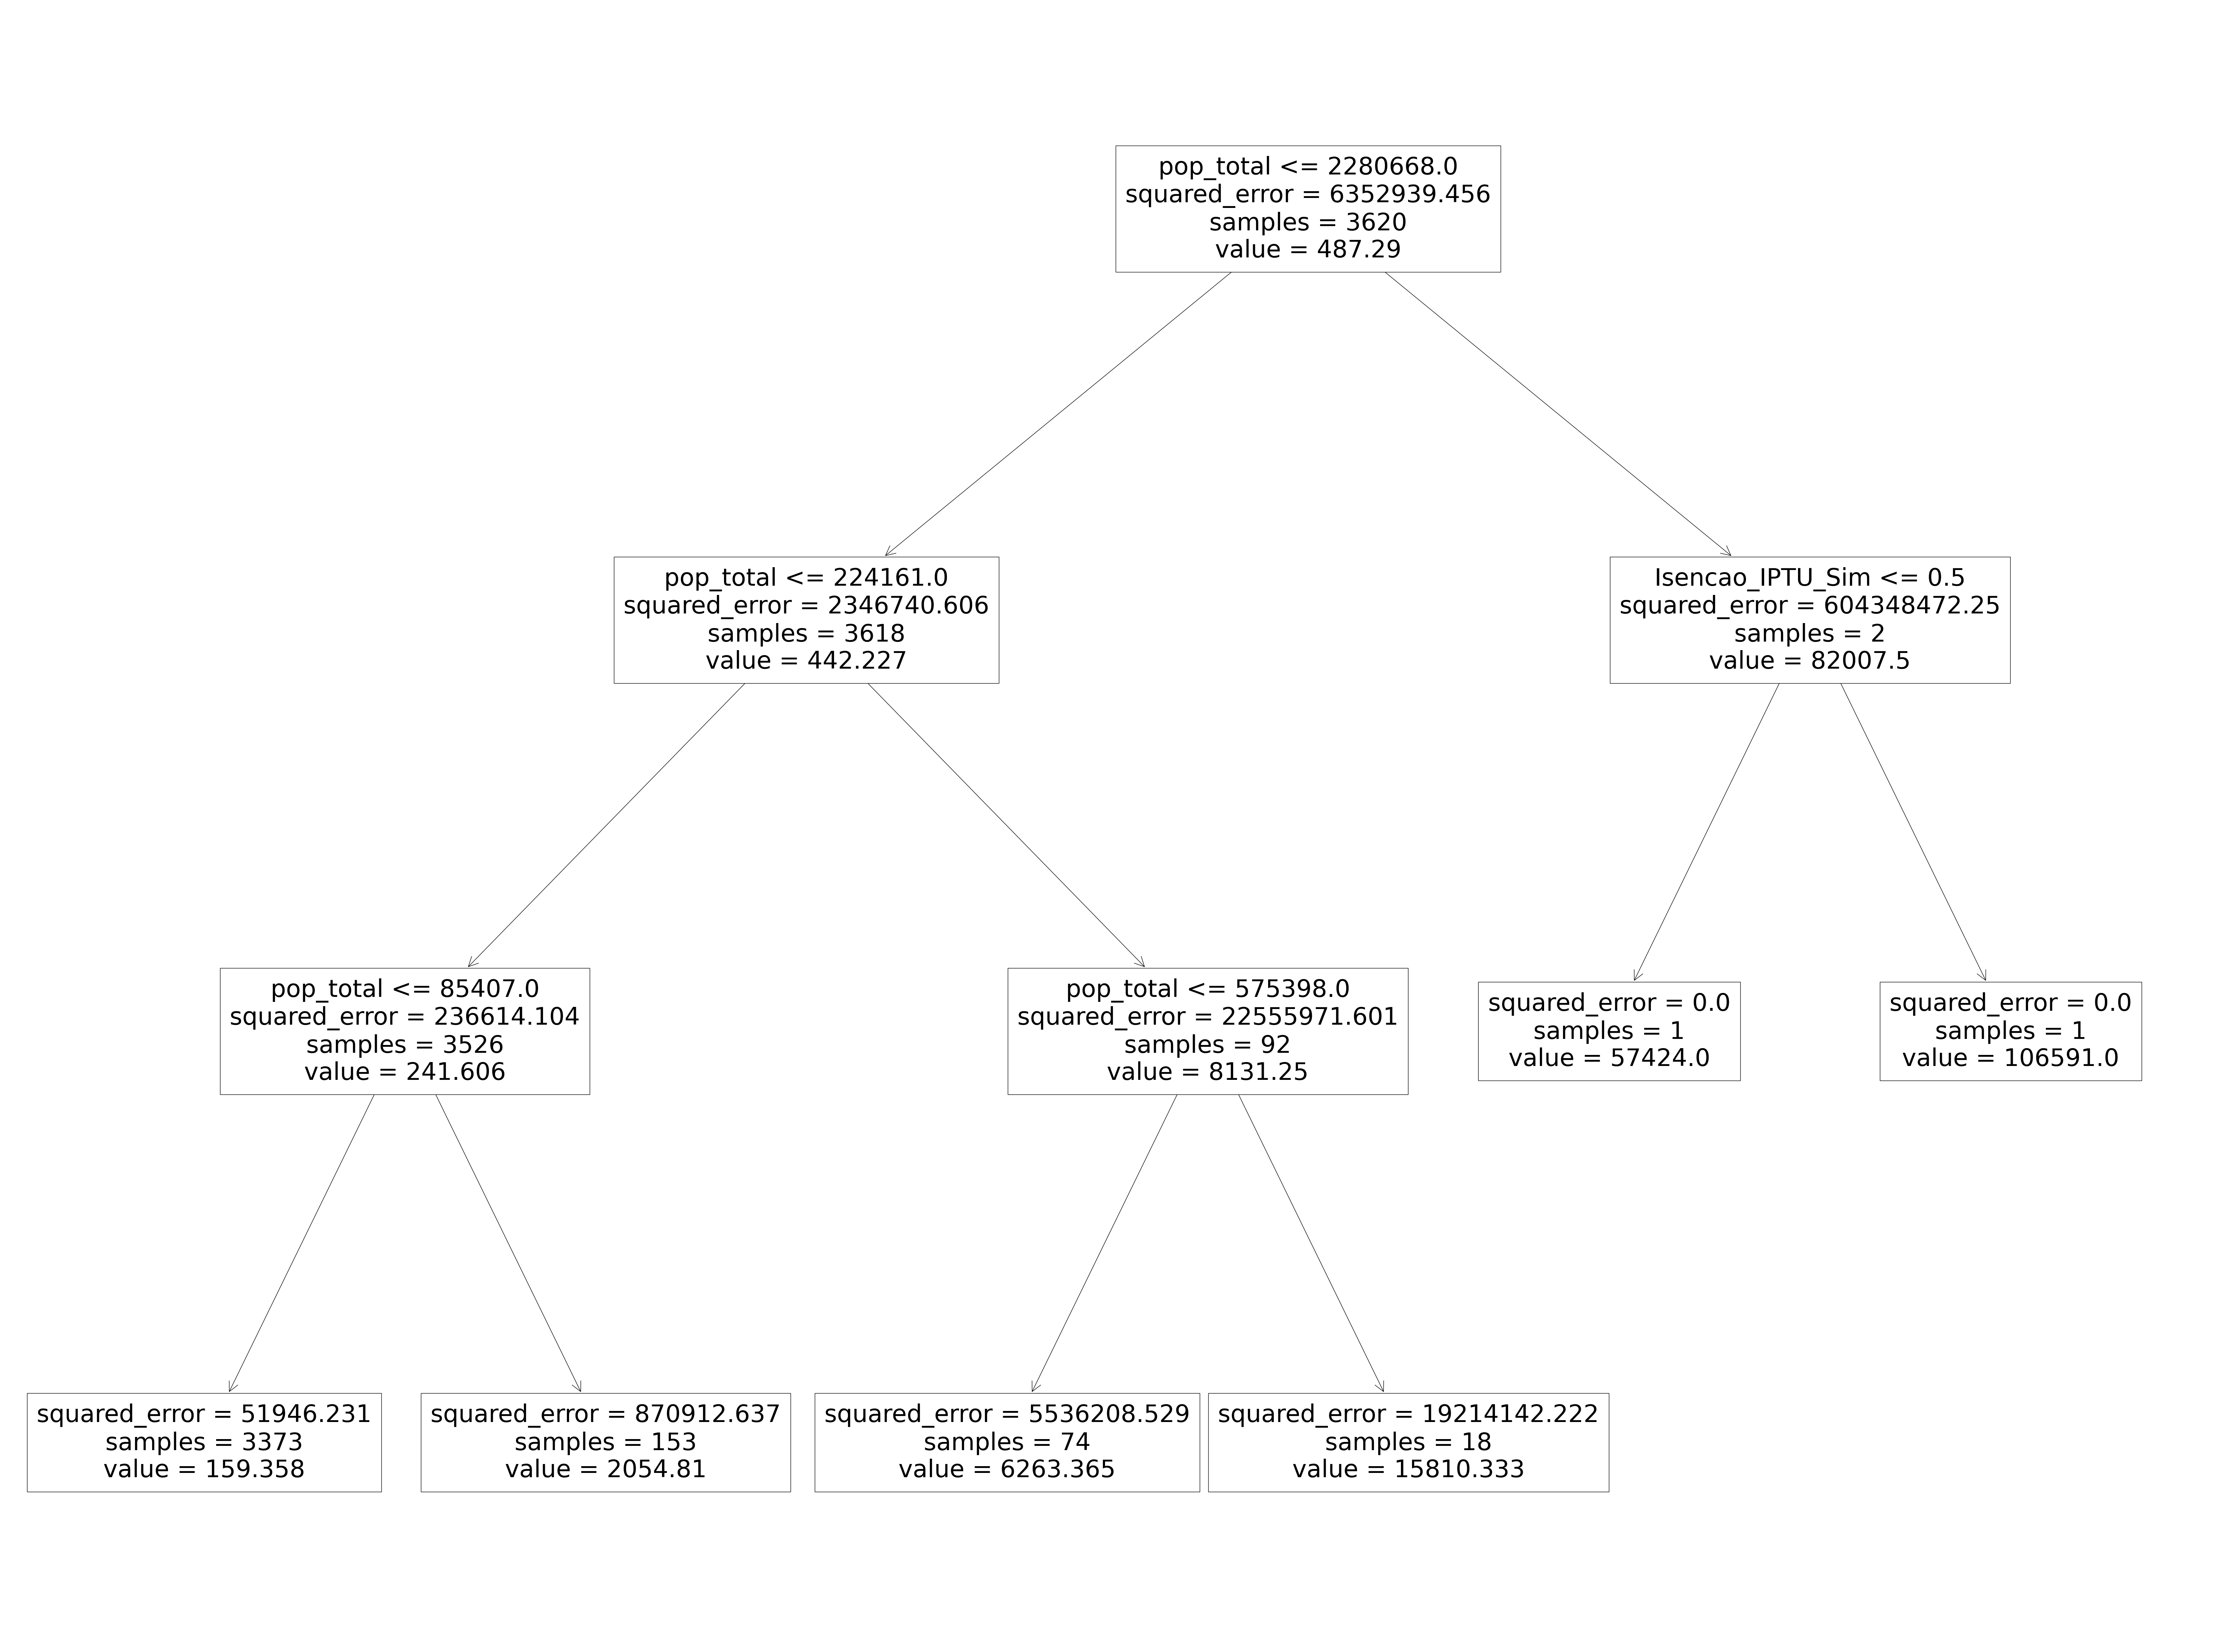

In [56]:
#pylab aumenta a vizual da figura
pylab.figure(figsize=(80,60))

#plot do infrografico
plot_tree(arvore_decisao, feature_names = X_treino.columns)